In [175]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline

In [176]:
df = pd.read_csv("/Users/rohithr/Desktop/segmentation/Datasets/behavioural_dataset.csv")


In [177]:
df.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [178]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [179]:
df.rename(columns={'Marrital Status':'Marrital_Status'},inplace=True)
df.rename(columns={'No of Dependents':'No_of_Dependents'},inplace=True)
df.rename(columns={'Personal loan':'Personal_loan'},inplace=True)
df.rename(columns={'Total Salary':'Total_Salary'},inplace=True)

In [180]:
df.head()

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Personal_loan,Total_Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital_Status   99 non-null     object
 3   Education         99 non-null     object
 4   No_of_Dependents  99 non-null     int64 
 5   Personal_loan     99 non-null     object
 6   Total_Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [182]:
df.shape

(99, 8)

In [183]:
df.isin(['?']).sum()

Age                 0
Profession          0
Marrital_Status     0
Education           0
No_of_Dependents    0
Personal_loan       0
Total_Salary        0
Price               0
dtype: int64

In [184]:
df.duplicated().sum()

0

In [185]:
x = df.columns
print(x)
    

Index(['Age', 'Profession', 'Marrital_Status', 'Education', 'No_of_Dependents',
       'Personal_loan', 'Total_Salary', 'Price'],
      dtype='object')


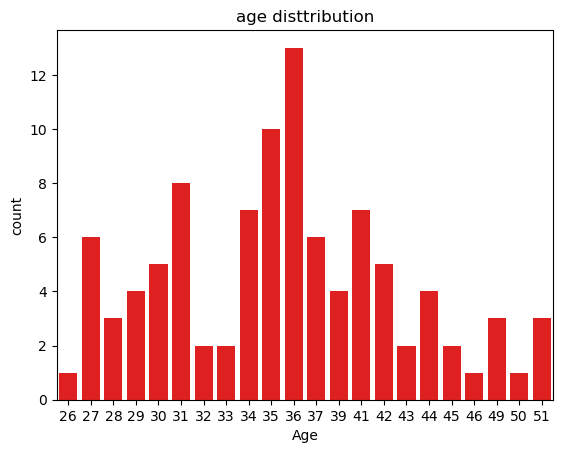

In [186]:
sns.countplot(x = "Age",data = df,color = 'r')
plt.title("age disttribution")
plt.show()

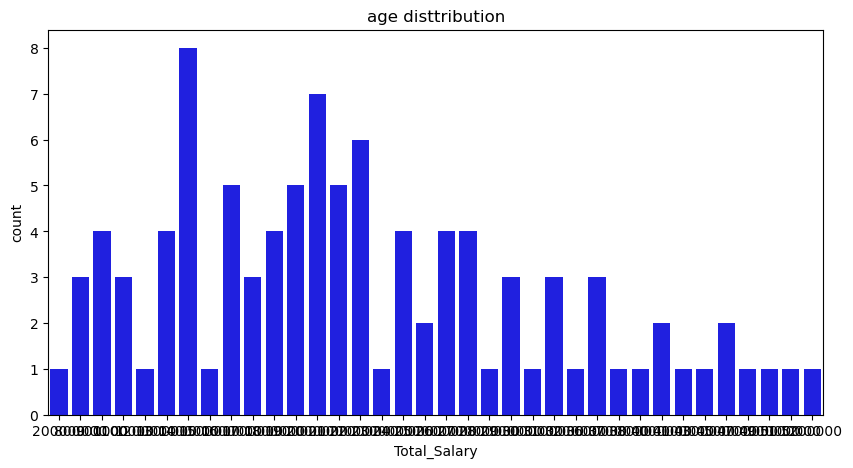

In [187]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Total_Salary",data = df,color = 'b')
plt.title("age disttribution")
plt.show()

In [188]:
#the first coloumns have categorical values henc applying lable encoder to them
#One-Hot Encoding generates several binary columns, according to the number of distinct categories, whereas Label Encoding only generates a single column for the categorical variable
from sklearn.preprocessing import LabelEncoder
#appying encoder to first 11 colomns
def encoding(x):
    df[x] = LabelEncoder().fit_transform(df[x]) #we apply fit_transform because it calcs the means and sd 
    return df
cols = ['Age', 'Profession', 'Marrital_Status', 'Education', 'No_of_Dependents',
       'Personal_loan', 'Total_Salary', 'Price'] #first 11 coloumnS
for i in cols:
    encoding(i)#applying the lable encoder
    
df

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Personal_loan,Total_Salary,Price
0,1,1,1,1,0,1,1,2
1,9,1,0,1,1,1,12,3
2,17,0,0,0,3,1,10,5
3,13,0,0,1,2,0,14,5
4,5,1,0,1,1,1,18,8
...,...,...,...,...,...,...,...,...
94,1,0,1,0,0,0,16,8
95,20,1,0,1,2,0,34,8
96,21,0,0,0,1,1,14,4
97,21,1,0,1,1,0,28,7


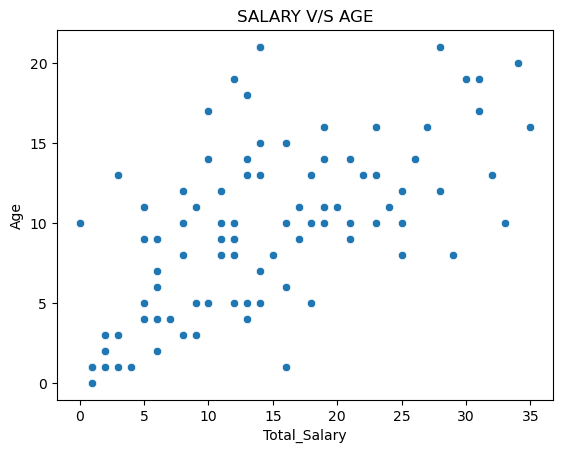

In [189]:
sns.scatterplot(x = 'Total_Salary',y = 'Age',data = df)
plt.title("SALARY V/S AGE")
plt.show()

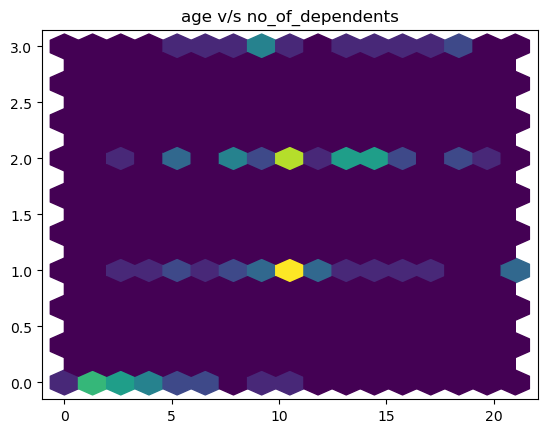

In [190]:
plt.hexbin(x = 'Age', y = 'No_of_Dependents', data = df,gridsize=16)
plt.title("age v/s no_of_dependents")
plt.show()

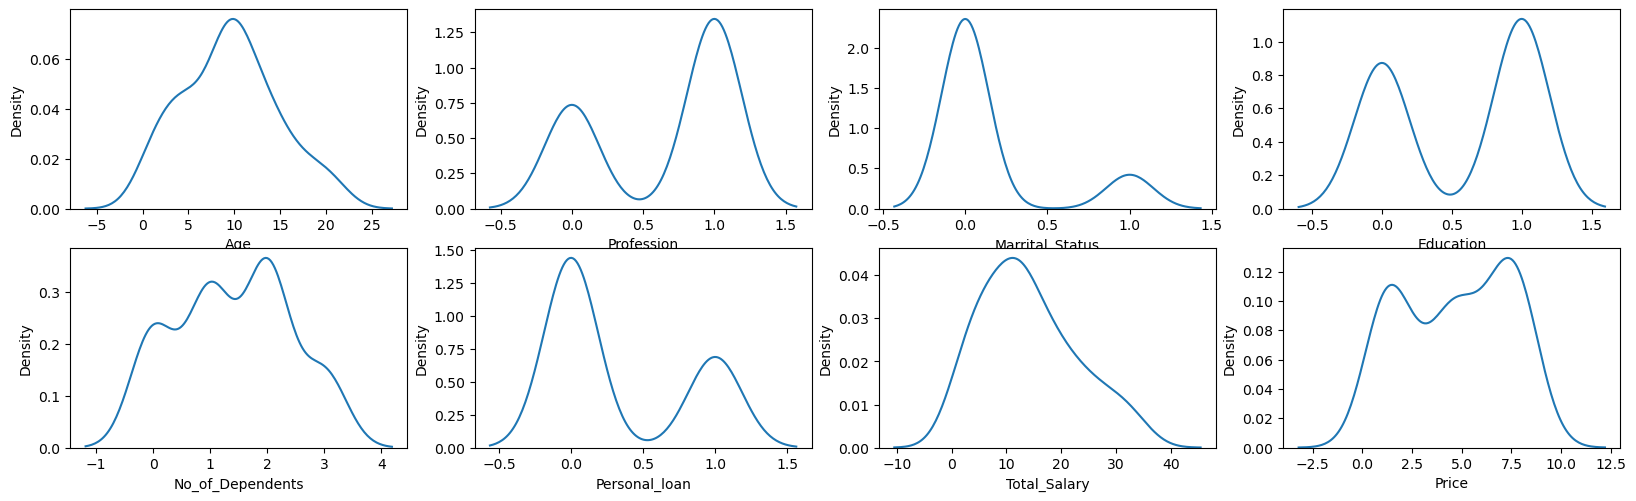

In [191]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(5, 4, i+1)
        sns.kdeplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show() 


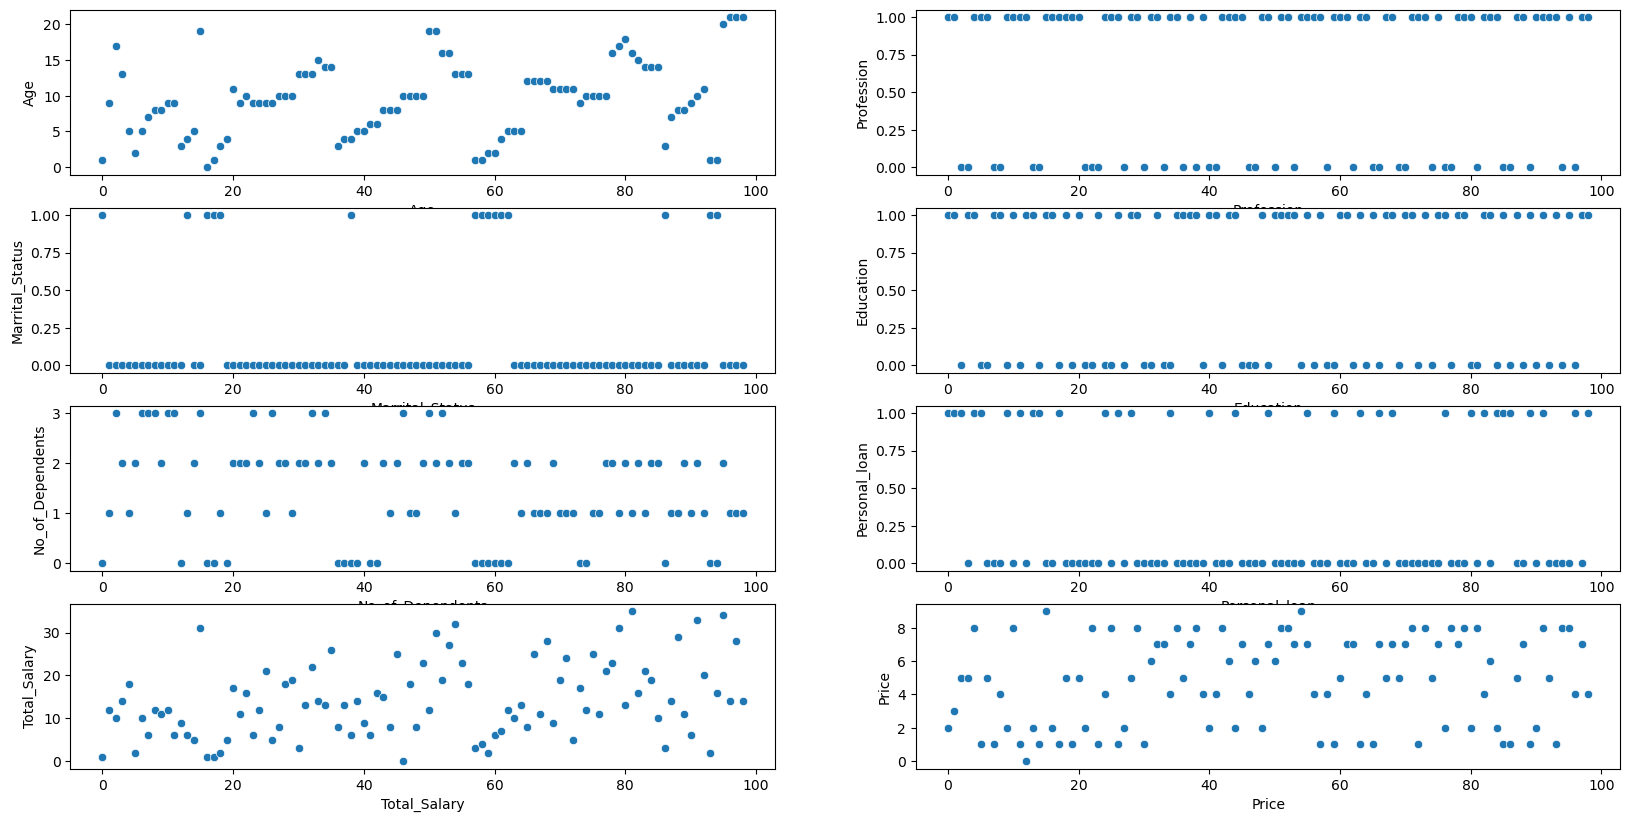

In [192]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(6, 2, i+1)
        sns.scatterplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show() 

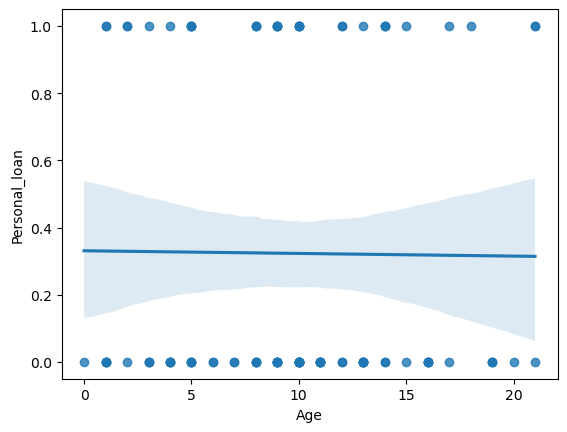

In [193]:
#age v/s loan
sns.regplot(x = 'Age',y = 'Personal_loan',data = df)
plt.show()

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


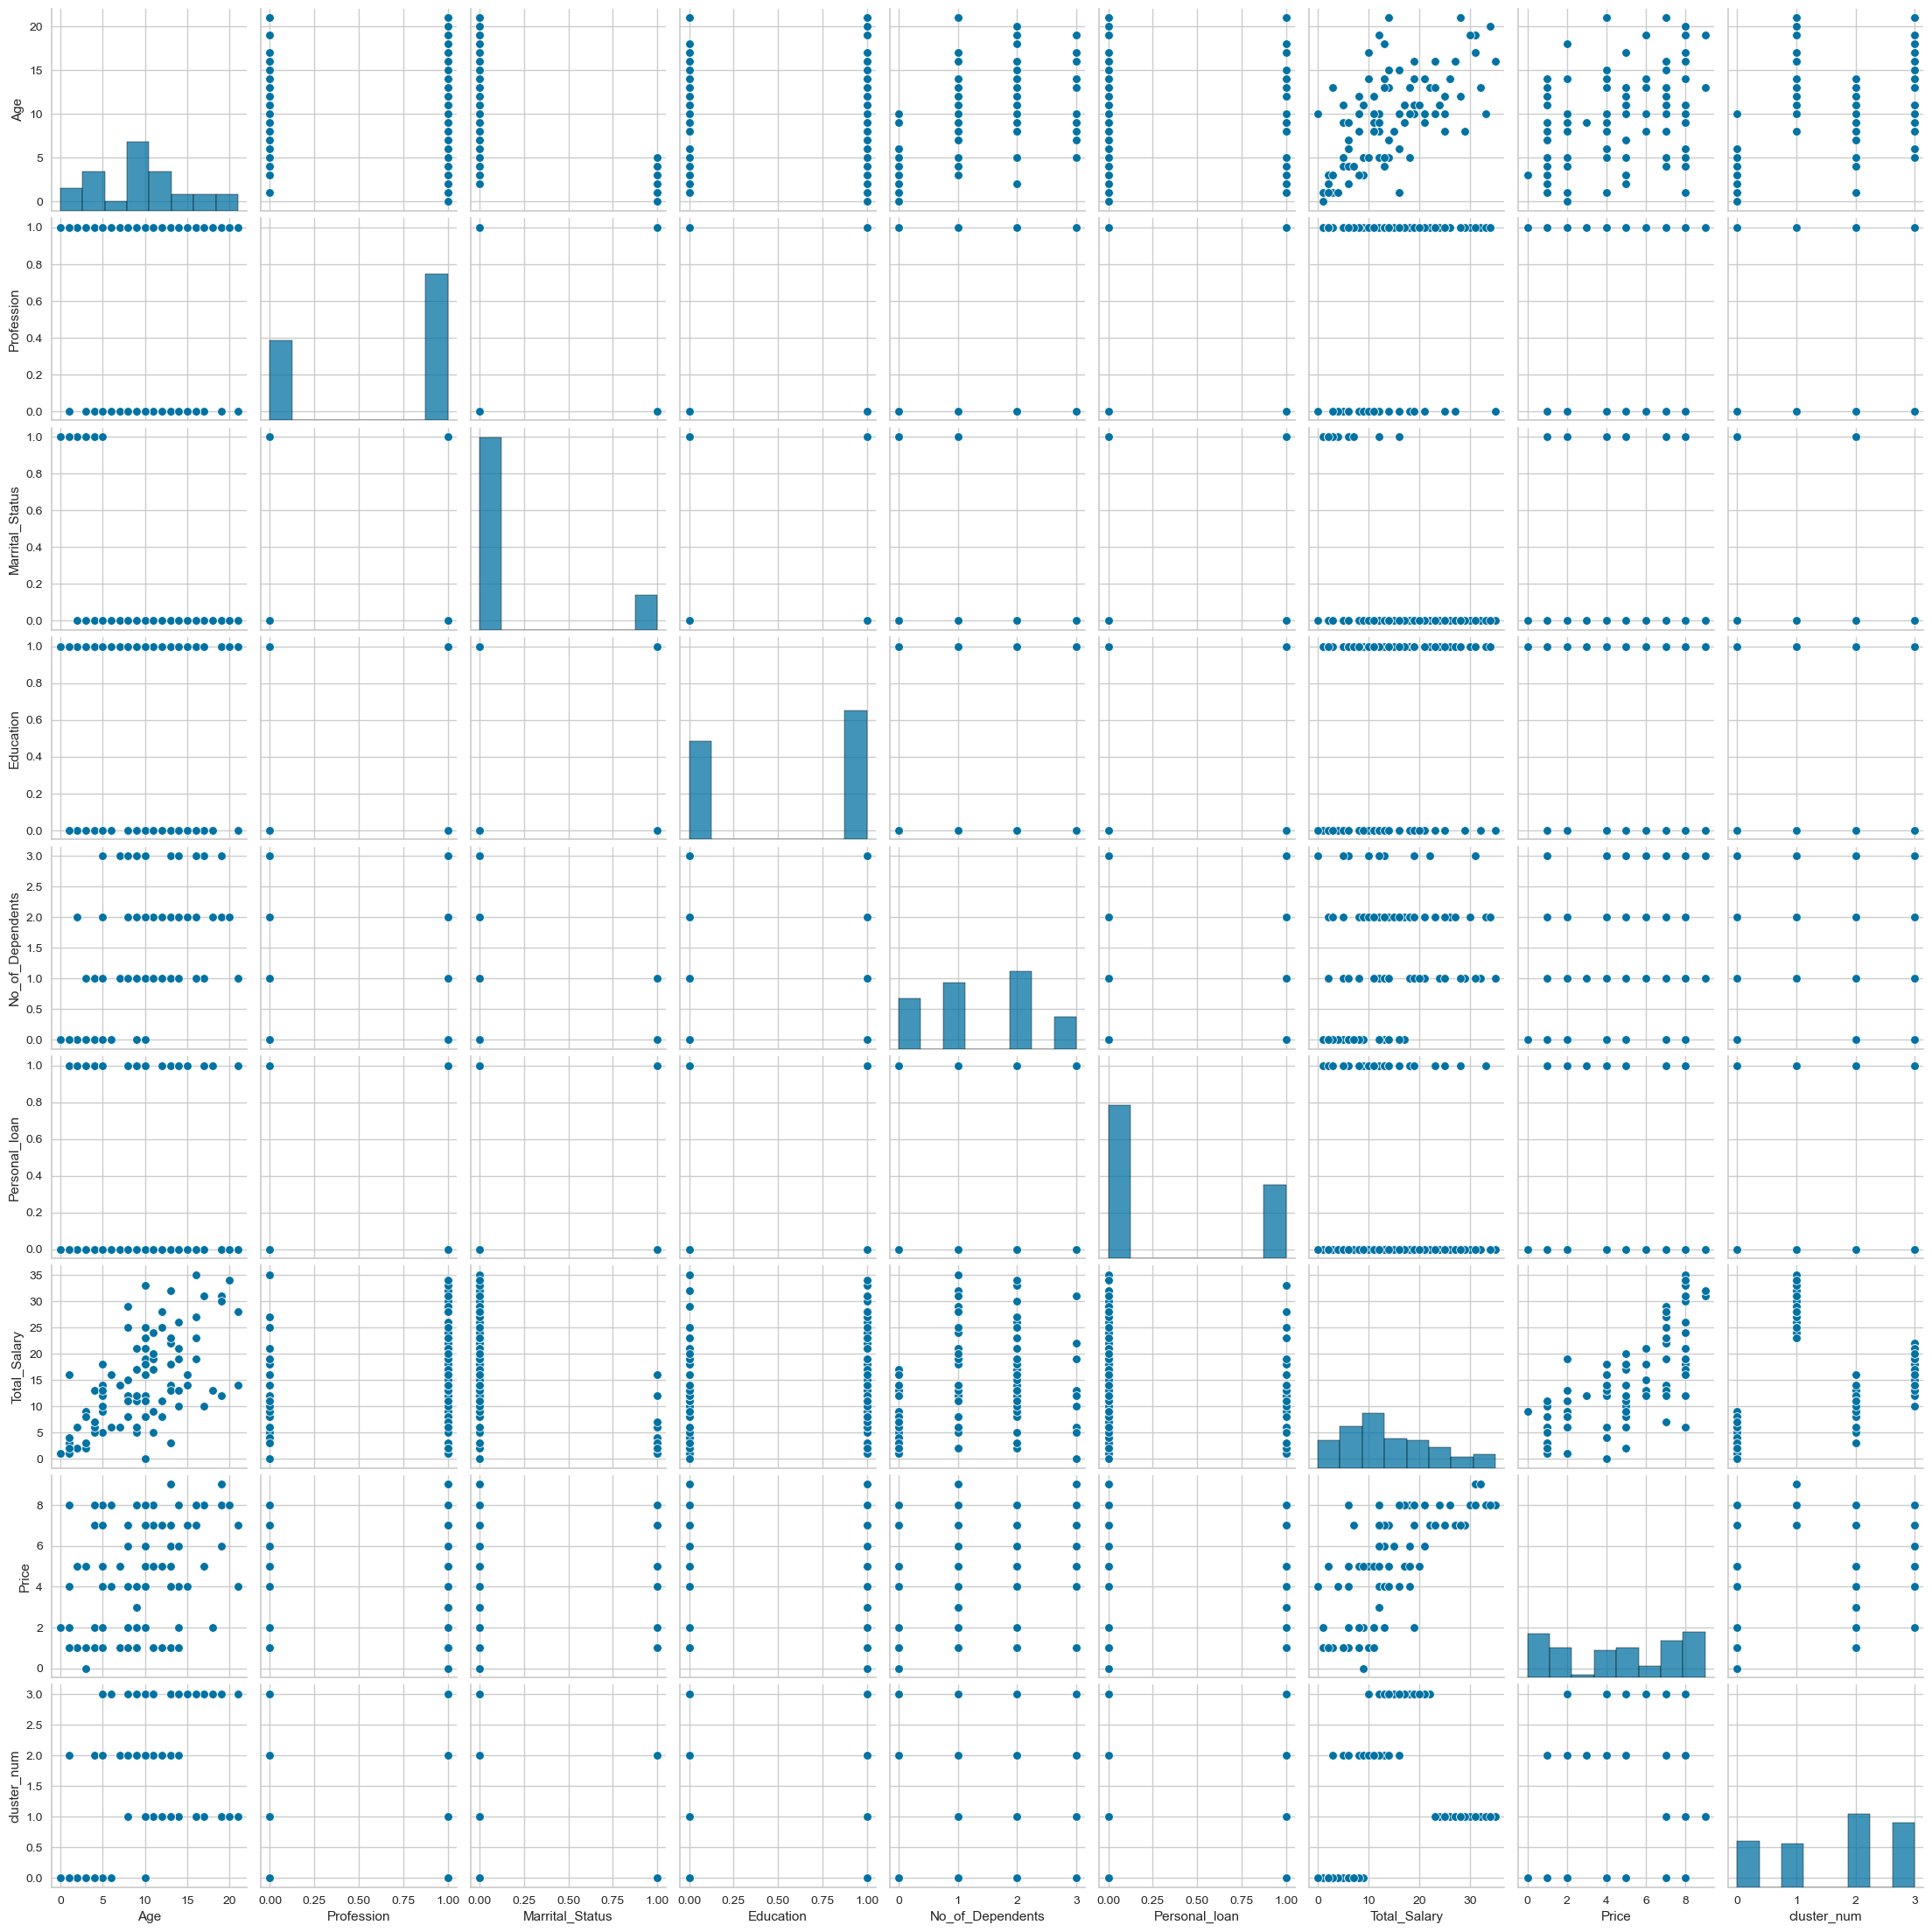

In [226]:
sns.pairplot(df)

In [194]:
size = df['Marrital_Status'].value_counts()

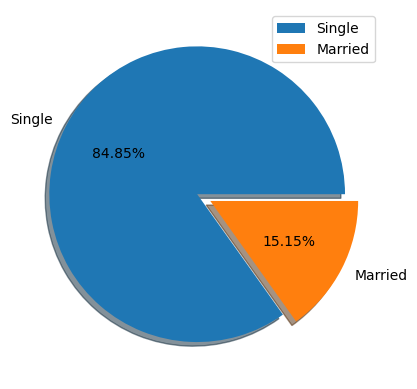

In [195]:

#plotting a pie chart for better understanding of gender distribution
plt.pie(size , labels = ['Single' , 'Married'] , explode = (0,0.1),shadow = True , autopct =  '%.2f%%')
#explode : The explode parameter value represents how far each wedge is from the center of the pie chart.
#autopct is used to give numeric value to the distributions
plt.axis("off")
plt.legend()
plt.show()

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


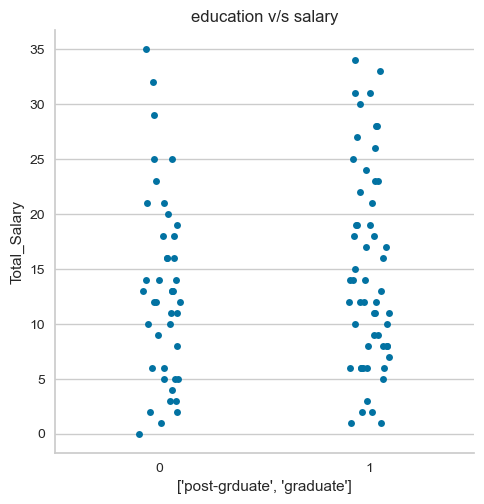

In [224]:
sns.catplot(x = df['Education'],y = df['Total_Salary'])
plt.title("education v/s salary")
plt.xlabel(["post-grduate","graduate"])
plt.show()

In [196]:
eight = df.loc[:,cols]
#loc is used and not iloc because loc takes lables and loc also includes both the indices when printing thr result
#cols are the first eleven coloumns initialised in the label encoder cell
eight

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Personal_loan,Total_Salary,Price
0,1,1,1,1,0,1,1,2
1,9,1,0,1,1,1,12,3
2,17,0,0,0,3,1,10,5
3,13,0,0,1,2,0,14,5
4,5,1,0,1,1,1,18,8
...,...,...,...,...,...,...,...,...
94,1,0,1,0,0,0,16,8
95,20,1,0,1,2,0,34,8
96,21,0,0,0,1,1,14,4
97,21,1,0,1,1,0,28,7


In [197]:
x = df.loc[:,cols].values
x

array([[ 1,  1,  1,  1,  0,  1,  1,  2],
       [ 9,  1,  0,  1,  1,  1, 12,  3],
       [17,  0,  0,  0,  3,  1, 10,  5],
       [13,  0,  0,  1,  2,  0, 14,  5],
       [ 5,  1,  0,  1,  1,  1, 18,  8],
       [ 2,  1,  0,  0,  2,  1,  2,  1],
       [ 5,  1,  0,  0,  3,  0, 10,  5],
       [ 7,  0,  0,  1,  3,  0,  6,  1],
       [ 8,  0,  0,  1,  3,  0, 12,  4],
       [ 8,  1,  0,  0,  2,  1, 11,  2],
       [ 9,  1,  0,  1,  3,  0, 12,  8],
       [ 9,  1,  0,  0,  3,  1,  6,  1],
       [ 3,  1,  0,  1,  0,  0,  9,  0],
       [ 4,  0,  1,  1,  1,  1,  6,  2],
       [ 5,  0,  0,  0,  2,  1,  5,  1],
       [19,  1,  0,  1,  3,  0, 31,  9],
       [ 0,  1,  1,  1,  0,  0,  1,  2],
       [ 1,  1,  1,  0,  0,  1,  1,  1],
       [ 3,  1,  1,  1,  1,  0,  2,  5],
       [ 4,  1,  0,  0,  0,  0,  5,  1],
       [11,  1,  0,  1,  2,  0, 17,  5],
       [ 9,  0,  0,  0,  2,  0, 11,  2],
       [10,  0,  0,  0,  2,  0, 16,  8],
       [ 9,  0,  0,  1,  3,  0,  6,  1],
       [ 9,  1, 

In [199]:
#performing pca
#pca is perforned to get linerly dependent variables by ddawing perpendiculars
from sklearn.decomposition import PCA
from sklearn import preprocessing
data = preprocessing.scale(x,with_mean=True,with_std=True) #standerdizing the data
#why scaling and not normalization : because scaling changes the range of the data while not changing the shape normalization changes the shape of the data
pca = PCA(n_components=8)#pca uing sigular value distribution
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']
pf = pd.DataFrame(data = pc,columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-15.672532,-2.746321,-0.028765,-0.696434,-0.683916,-0.393485,0.537323,-0.253809
1,-2.423150,0.526470,-1.182600,-0.427182,-0.579986,-0.293891,0.368688,0.284456
2,-0.600612,8.316092,2.149817,0.716418,0.600862,-0.426720,0.652079,-0.023705
3,1.383693,3.143510,0.760694,0.199602,-0.054082,0.745770,0.101830,0.037245
4,2.400521,-6.241743,1.444509,0.474521,-0.516166,-0.497966,0.724722,0.474860
...,...,...,...,...,...,...,...,...
94,-1.019155,-9.294001,1.734480,-0.152588,0.910390,0.240018,0.361432,-0.419859
95,22.666213,1.729064,-1.011503,-0.339030,-0.358518,0.213492,-0.191887,-0.363529
96,4.296624,10.462520,0.685970,-1.780389,0.712722,-0.318067,0.649724,0.069617
97,17.460872,4.837193,-0.173516,-1.559533,-0.416385,0.106073,-0.220494,-0.172722


In [200]:
np.cumsum(pca.explained_variance_ratio_)

array([0.82503771, 0.96277064, 0.98765219, 0.99380955, 0.99619791,
       0.99795888, 0.99945286, 1.        ])

In [201]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = eight.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
Age,0.394761,0.902087,0.119612,-0.124169,-0.008310,-0.017938,-0.002518,-0.016749
Profession,0.008589,-0.024399,-0.040214,-0.036056,-0.528448,-0.700561,-0.473368,-0.047887
Marrital_Status,-0.018941,-0.033094,0.040956,-0.128589,-0.040418,-0.013574,0.171442,-0.974230
Education,0.004877,-0.001936,0.011880,-0.013727,-0.844998,0.476719,0.230810,0.071314
No_of_Dependents,0.026202,0.126049,-0.042138,0.979157,-0.033781,0.010203,-0.040088,-0.141597
Personal_loan,-0.006878,0.019485,-0.116433,0.050750,-0.058681,-0.522185,0.828704,0.143422
Total_Salary,0.894449,-0.354191,-0.270281,0.007536,0.016088,0.028009,-0.000628,-0.018884
Price,0.207204,-0.206944,0.945449,0.071963,-0.013190,-0.088776,0.069947,0.047342


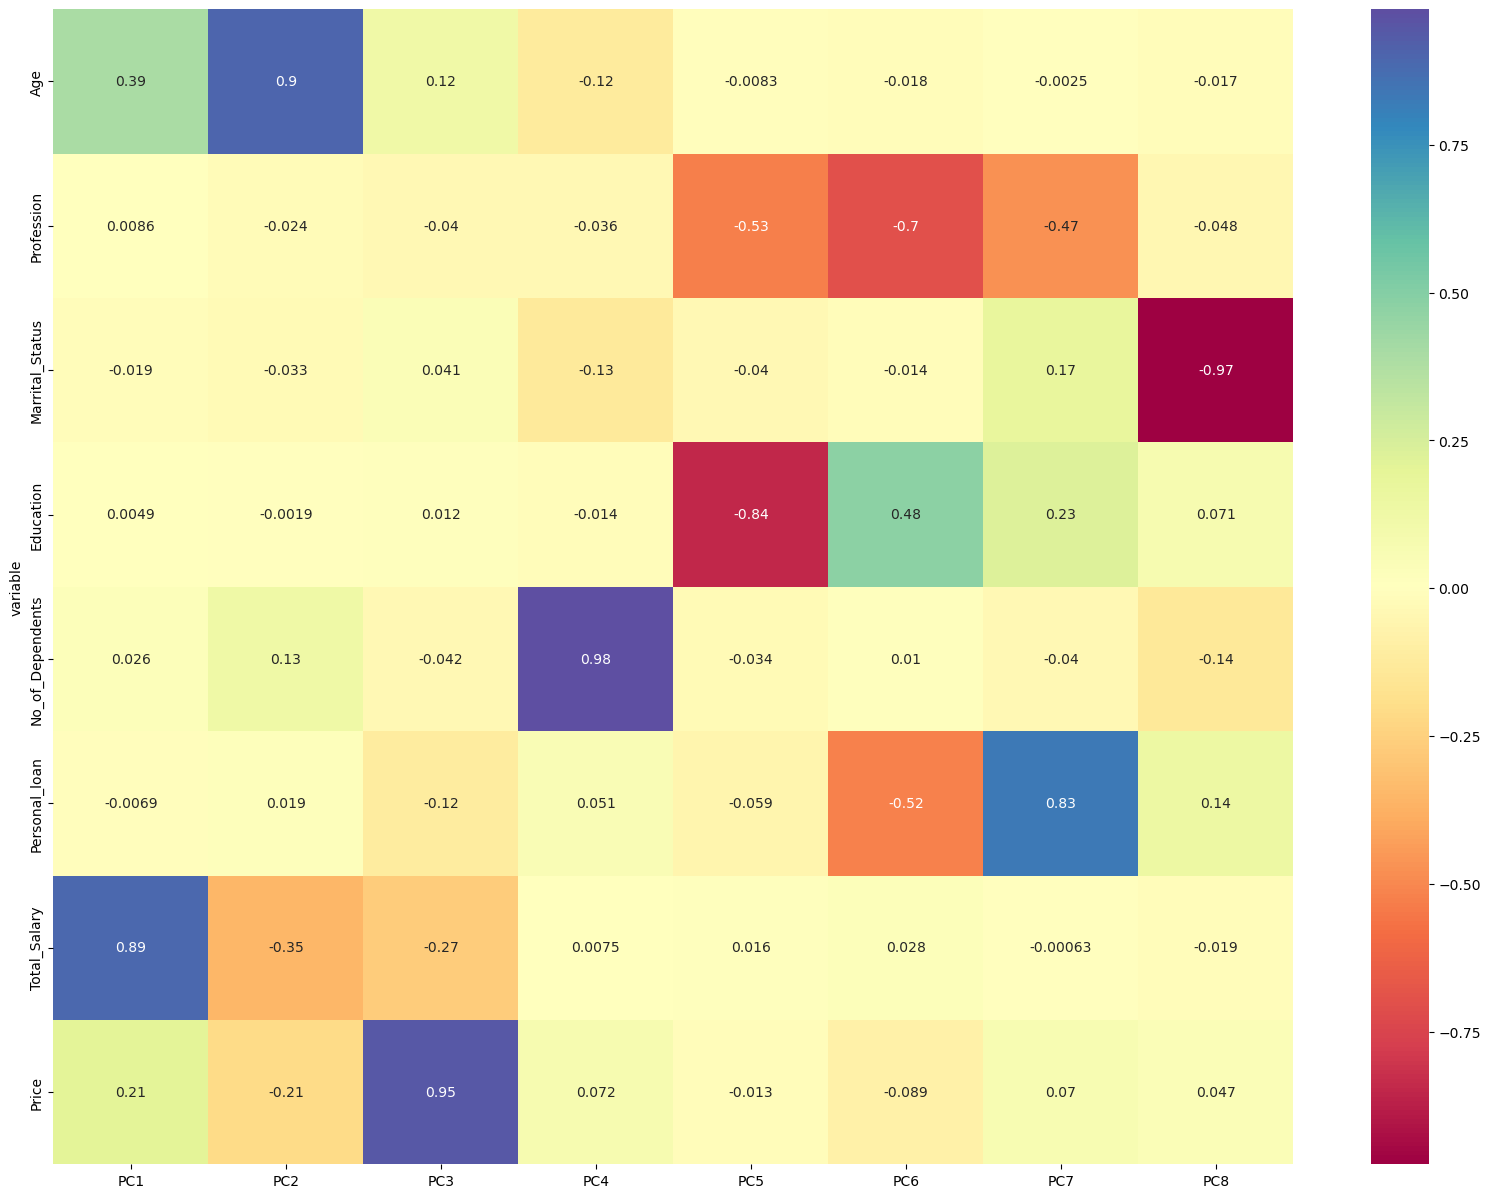

In [202]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

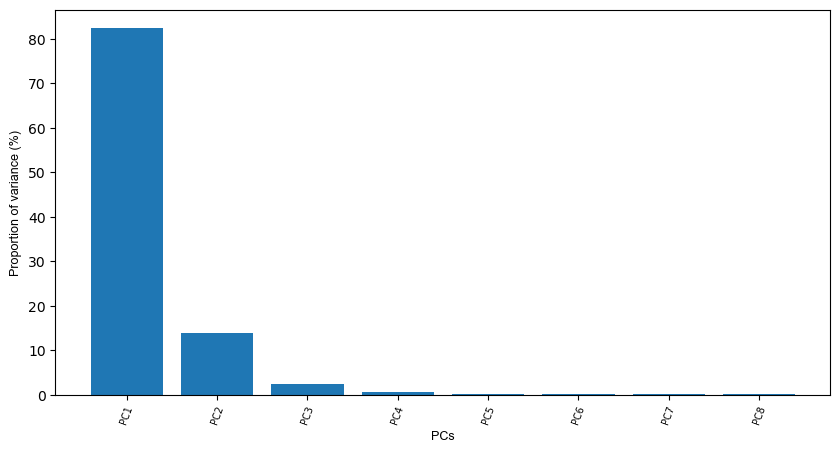

In [203]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

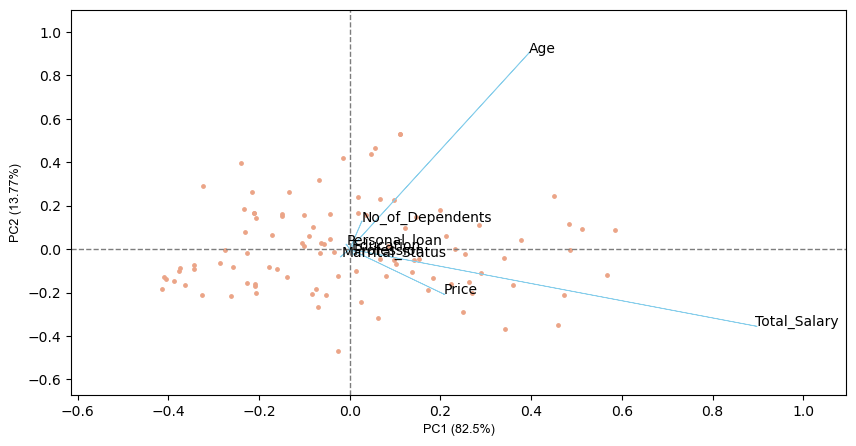

In [204]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))
#the untangled data using pca

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

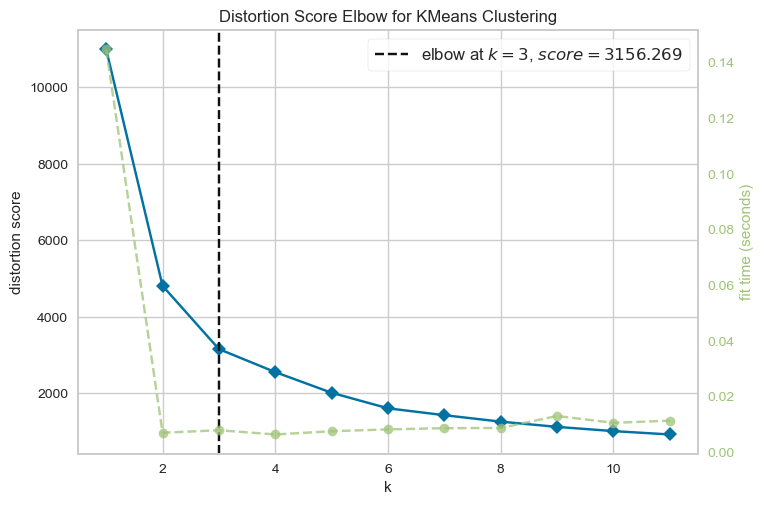

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [206]:
#extracting the segments
#getting clusterrs using kmeans
#kmeans: unsupervised non parametric ckustering algo
#the k value is not needed to be set prehand 
#will find the best value using the elbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
m = KMeans()
vis = KElbowVisualizer(m,k=(1,12),distance_metric='euclidean').fit(eight)
vis.show()

In [208]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(eight)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[0 2 3 3 3 0 2 2 2 2 2 2 0 0 0 1 0 0 0 0 3 2 3 2 2 3 2 2 3 3 2 3 3 3 3 1 0
 2 0 2 2 0 3 3 2 1 0 3 2 1 3 1 3 1 1 1 3 0 0 0 0 0 2 2 2 2 1 2 1 2 3 1 2 3
 2 1 2 3 1 1 3 1 3 3 3 2 0 2 1 2 2 1 3 0 2 1 3 1 3]
2554.286137218045
8
[[3.00000000e+00 6.00000000e-01 6.50000000e-01 6.00000000e-01
  4.50000000e-01 3.50000000e-01 3.95000000e+00 2.80000000e+00]
 [1.39473684e+01 8.42105263e-01 2.77555756e-17 6.84210526e-01
  1.57894737e+00 2.63157895e-01 2.80000000e+01 7.57894737e+00]
 [8.31250000e+00 5.31250000e-01 6.25000000e-02 5.31250000e-01
  1.62500000e+00 3.43750000e-01 9.81250000e+00 3.12500000e+00]
 [1.27142857e+01 6.78571429e-01 5.55111512e-17 5.00000000e-01
  1.71428571e+00 3.21428571e-01 1.66785714e+01 5.85714286e+00]]


/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [209]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 20, 2: 32, 3: 28, 1: 19})

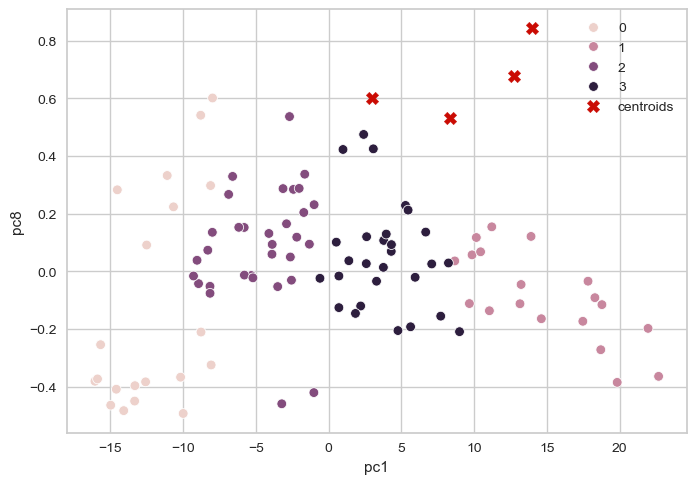

In [225]:
#Visulazing clusters using scatter plot
sns.scatterplot(data=pf, x="pc1", y="pc8", hue=kmeans.labels_)#the x and y are the "names" parameter in the pca analysis cell
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

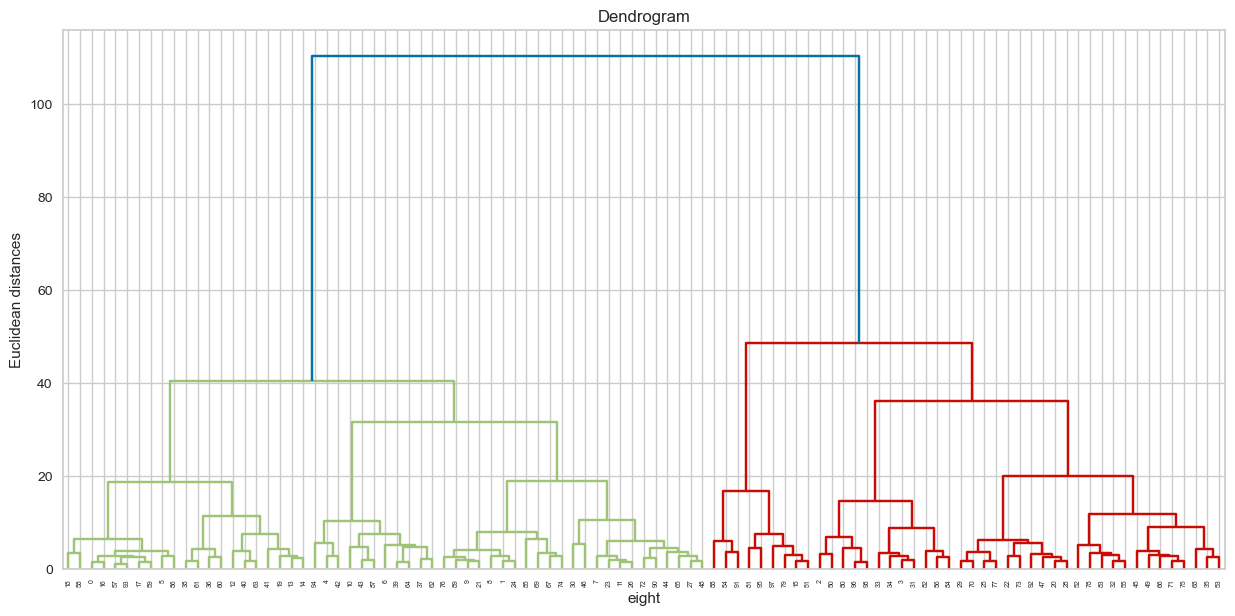

In [212]:
#agglomarative clustering
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('eight')
plt.ylabel('Euclidean distances')
plt.show()